In [1]:
# Monte-Carlo playoff odds
# Generate my own playoff odds

# For now, I'm focusing on the mechanics of the simulation, and less so on the inputs (e.g., the projected team quality)
# So I'm using 538's win probabilities for each game, rather than computing my own

# I'm also using 538's results/schedule data, because it is so easy to use

import pandas as pd
import numpy as np
import seaborn as sns

from playoff_odds import *

%matplotlib inline

In [2]:
(played, remain) = get_games()
played.shape, remain.shape

((1953, 26), (477, 26))

# Define some functions that will be used in the simulation

In [3]:
compute_standings(played)

,W,L
LAD,90,39
HOU,84,47
NYM,83,48
ATL,80,51
NYY,79,52
STL,76,55
SDP,73,59
PHI,73,58
SEA,73,58
TBD,72,57


In [4]:


rand0 = get_randoms(0)
sim_rem_games(remain, rand0)

,W,L
LAD,21,12
SEA,21,10
TOR,20,13
ATL,20,11
MIN,19,14
HOU,19,12
PHI,18,13
TBD,18,15
NYM,18,13
CLE,18,16


In [5]:
rand0 = get_randoms(0)
type(rand0)


pandas.core.series.Series

In [6]:
cur_standings = compute_standings(played)
rem_standings = sim_rem_games(remain, rand0)
full_standings = cur_standings+rem_standings
full_standings

,W,L
ANA,73,89
ARI,78,84
ATL,100,62
BAL,83,79
BOS,80,82
CHC,68,94
CHW,80,82
CIN,68,94
CLE,86,76
COL,72,90


In [7]:

     

add_playoff_seeds(full_standings, rand0)

,W,L,wpct,div,lg,rand,div_win,lg_rank
HOU,103,59,0.635802,ALW,,0.085471,True,1
NYM,101,61,0.623457,NLE,,0.182975,True,2
NYY,94,68,0.580247,ALE,,0.150689,True,3
STL,92,70,0.567901,NLC,,0.793010,True,4
CLE,86,76,0.530864,ALC,,0.799368,True,5
ATL,100,62,0.617284,NLE,,0.436556,False,6
SEA,94,68,0.580247,ALW,,0.898484,False,7
PHI,91,71,0.561728,NLE,,0.970650,False,8
TBD,90,72,0.555556,ALE,,0.859450,False,9
TOR,90,72,0.555556,ALE,,0.339773,False,10


In [8]:
finish_one_season(cur_standings, remain, rand0)

,W,L,wpct,div,lg,rand,div_win,lg_rank
HOU,103,59,0.635802,ALW,,0.085471,True,1
NYM,101,61,0.623457,NLE,,0.182975,True,2
NYY,94,68,0.580247,ALE,,0.150689,True,3
STL,92,70,0.567901,NLC,,0.793010,True,4
CLE,86,76,0.530864,ALC,,0.799368,True,5
ATL,100,62,0.617284,NLE,,0.436556,False,6
SEA,94,68,0.580247,ALW,,0.898484,False,7
PHI,91,71,0.561728,NLE,,0.970650,False,8
TBD,90,72,0.555556,ALE,,0.859450,False,9
TOR,90,72,0.555556,ALE,,0.339773,False,10


In [9]:
sim_results = sim_n_seasons(cur_standings, remain, 10)
sim_results

,,W,L,wpct,div,lg,rand,div_win,lg_rank
team,iter,,,,,,,,
HOU,0,103,59,0.635802,ALW,,0.085471,True,1
NYM,0,101,61,0.623457,NLE,,0.182975,True,2
NYY,0,94,68,0.580247,ALE,,0.150689,True,3
STL,0,92,70,0.567901,NLC,,0.793010,True,4
CLE,0,86,76,0.530864,ALC,,0.799368,True,5
...,...,...,...,...,...,...,...,...,...
LAD,9,116,46,0.716049,NLW,N,0.068159,True,1
SDP,9,86,76,0.530864,NLW,N,0.215642,False,2
SFG,9,78,84,0.481481,NLW,N,0.595551,False,3


In [10]:
# Count the number of div/wc/playoff appearances by team from a set of results
summarize_sim_results(sim_results)

,mean_wins,1,2,3,4,5,6,div_wins,playoffs,champ_shares
team,,,,,,,,,,
ANA,72.2,0,0,0,0,0,0,0,0,0.0000
ARI,75.2,0,0,4,6,0,0,4,10,0.6250
ATL,99.7,0,0,0,0,0,10,0,10,0.6250
BAL,83.8,0,0,0,0,0,0,0,0,0.0000
BOS,77.3,0,0,0,0,0,0,0,0,0.0000
CHC,70.7,0,0,0,0,0,0,0,0,0.0000
CHW,81.7,0,0,0,0,1,0,0,1,0.0625
CIN,66.7,0,0,0,0,0,0,0,0,0.0000
CLE,86.2,0,0,0,0,7,0,0,7,0.4375


In [11]:
sim_results.groupby('iter')['W'].max().median()

112.0

In [12]:
summary = summarize_sim_results(sim_results)
print(summary.sort_values('champ_shares', ascending=False).to_string())

      mean_wins   1   2  3  4   5   6  div_wins  playoffs  champ_shares
team                                                                   
SDP        88.0   0  10  0  0   0   0        10        10        1.2500
NYM       102.8   6   4  0  0   0   0        10        10        1.2500
LAD       112.5  10   0  0  0   0   0        10        10        1.2500
HOU       101.5   4   5  0  1   0   0         9        10        1.1875
NYY        97.1   0   1  9  0   0   0        10        10        0.6875
SFG        76.1   0   0  6  4   0   0         6        10        0.6250
ATL        99.7   0   0  0  0   0  10         0        10        0.6250
STL        93.4   0   0  1  9   0   0         1        10        0.6250
COL        68.4   0   0  0  0  10   0         0        10        0.6250
ARI        75.2   0   0  4  6   0   0         4        10        0.6250
CLE        86.2   0   0  0  0   7   0         0         7        0.4375
MIN        84.3   0   0  0  0   2   0         0         2       

In [13]:
# How many games does each team win in each seeding?
sim_results.query('lg_rank <= 6').groupby(['team', 'lg_rank'])['W'].mean().unstack()

lg_rank,1,2,3,4,5,6
team,,,,,,
ARI,NaN,NaN,77.750000,73.500000,NaN,NaN
ATL,NaN,NaN,NaN,NaN,NaN,99.7
CHW,NaN,NaN,NaN,NaN,86.000000,NaN
CLE,NaN,NaN,NaN,NaN,88.142857,NaN
COL,NaN,NaN,NaN,NaN,68.400000,NaN
HOU,104.750000,100.4,NaN,94.000000,NaN,NaN
LAD,112.500000,NaN,NaN,NaN,NaN,NaN
MIN,NaN,NaN,NaN,NaN,83.000000,NaN
NYM,102.666667,103.0,NaN,NaN,NaN,NaN


In [14]:
remain.tail(10)


,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
467,2022-09-02,2022,0,NaN,BOS,TEX,1491.592162,1477.467519,0.554647,0.445353,...,52.253172,40.007933,3.443691,-49.952349,0.648477,0.351523,NaN,NaN,NaN,NaN
468,2022-09-02,2022,0,NaN,BAL,OAK,1507.515258,1457.133468,0.605438,0.394562,...,50.759057,50.781979,-1.562693,5.018817,0.596925,0.403075,NaN,NaN,NaN,NaN
469,2022-09-02,2022,0,NaN,CIN,COL,1467.167484,1459.196884,0.545880,0.454120,...,46.628660,52.378554,-5.917108,10.574033,0.540688,0.459312,NaN,NaN,NaN,NaN
470,2022-09-02,2022,0,NaN,PIT,TOR,1423.720538,1530.328385,0.383308,0.616692,...,44.826804,58.580794,-12.779480,28.039631,0.320243,0.679757,NaN,NaN,NaN,NaN
471,2022-09-01,2022,0,NaN,ARI,MIL,1486.195406,1519.420108,0.486728,0.513272,...,57.476155,58.321298,27.417502,20.253510,0.478032,0.521968,NaN,NaN,NaN,NaN
472,2022-09-01,2022,0,NaN,ATL,COL,1576.340235,1459.196884,0.692639,0.307361,...,57.952138,46.919757,12.802514,-15.082312,0.728845,0.271155,NaN,NaN,NaN,NaN
473,2022-09-01,2022,0,NaN,BOS,TEX,1491.592162,1477.467519,0.554647,0.445353,...,52.007052,49.430644,2.286930,-5.665603,0.587326,0.412674,NaN,NaN,NaN,NaN
474,2022-09-01,2022,0,NaN,CLE,BAL,1519.373856,1507.515258,0.551422,0.448578,...,60.483934,48.958109,31.261983,-10.027149,0.622781,0.377219,NaN,NaN,NaN,NaN
475,2022-09-01,2022,0,NaN,NYM,LAD,1557.693783,1621.367779,0.443151,0.556849,...,56.355741,56.976309,3.845265,5.157120,0.447391,0.552609,NaN,NaN,NaN,NaN
476,2022-09-01,2022,0,NaN,WSN,OAK,1425.898286,1457.133468,0.489589,0.510411,...,46.804042,47.400000,7.164136,-10.876483,0.550139,0.449861,NaN,NaN,NaN,NaN


In [15]:
sim_both_ways(cur_standings, remain.index.values[-1], 100, remain)

team
ANA    0.0
ARI    0.0
ATL    0.0
BAL    0.0
BOS    0.0
CHC    0.0
CHW    0.0
CIN    0.0
CLE    0.0
COL    0.0
DET    0.0
FLA    0.0
HOU    0.0
KCR    0.0
LAD    0.0
MIL    0.0
MIN    0.0
NYM    0.0
NYY    0.0
OAK    0.0
PHI    0.0
PIT    0.0
SDP    0.0
SEA    0.0
SFG    0.0
STL    0.0
TBD    0.0
TEX    0.0
TOR    0.0
WSN    0.0
Name: 476, dtype: float64

In [16]:
next_dt = remain['date'].min()
game_ids = remain.query('date == @next_dt').index.values
game_ids

array([471, 472, 473, 474, 475, 476])

In [19]:
results = pd.DataFrame()
for i in range(5):
    num_iterations = 10 ** i
    print(f'Starting {num_iterations} iterations')
    results = pd.concat([sim_both_ways(cur_standings, game_id, num_iterations, remain) for game_id in game_ids], axis=1)
    print(results)

Starting 1 iterations
      471  472  473     474  475  476
team                                 
ANA   0.0  0.0  0.0  0.0000  0.0  0.0
ARI   0.0  0.0  0.0  0.0000  0.0  0.0
ATL   0.0  0.0  0.0  0.0000  0.0  0.0
BAL   0.0  0.0  0.0  0.0000  0.0  0.0
BOS   0.0  0.0  0.0  0.0000  0.0  0.0
CHC   0.0  0.0  0.0  0.0000  0.0  0.0
CHW   0.0  0.0  0.0  0.0000  0.0  0.0
CIN   0.0  0.0  0.0  0.0000  0.0  0.0
CLE   0.0  0.0  0.0  0.0625  0.0  0.0
COL   0.0  0.0  0.0  0.0000  0.0  0.0
DET   0.0  0.0  0.0  0.0000  0.0  0.0
FLA   0.0  0.0  0.0  0.0000  0.0  0.0
HOU   0.0  0.0  0.0  0.0000  0.0  0.0
KCR   0.0  0.0  0.0  0.0000  0.0  0.0
LAD   0.0  0.0  0.0  0.0000  0.0  0.0
MIL   0.0  0.0  0.0  0.0000  0.0  0.0
MIN   0.0  0.0  0.0 -0.0625  0.0  0.0
NYM   0.0  0.0  0.0  0.0000  0.0  0.0
NYY   0.0  0.0  0.0  0.0000  0.0  0.0
OAK   0.0  0.0  0.0  0.0000  0.0  0.0
PHI   0.0  0.0  0.0  0.0000  0.0  0.0
PIT   0.0  0.0  0.0  0.0000  0.0  0.0
SDP   0.0  0.0  0.0  0.0000  0.0  0.0
SEA   0.0  0.0  0.0  0.0000 

In [ ]:
game_descs = remain.apply(lambda x: f'{x.team2}\n@{x.team1}', axis=1)
game_descs.to_dict()

{0: 'COL\n@LAD',
 1: 'DET\n@SEA',
 2: 'SFG\n@SDP',
 3: 'WSN\n@NYM',
 4: 'ARI\n@MIL',
 5: 'PHI\n@HOU',
 6: 'ATL\n@FLA',
 7: 'KCR\n@CLE',
 8: 'CHC\n@CIN',
 9: 'MIN\n@CHW',
 10: 'TBD\n@BOS',
 11: 'NYY\n@TEX',
 12: 'STL\n@PIT',
 13: 'TOR\n@BAL',
 14: 'ANA\n@OAK',
 15: 'COL\n@LAD',
 16: 'DET\n@SEA',
 17: 'SFG\n@SDP',
 18: 'ANA\n@OAK',
 19: 'PHI\n@HOU',
 20: 'MIN\n@CHW',
 21: 'NYY\n@TEX',
 22: 'ARI\n@MIL',
 23: 'WSN\n@NYM',
 24: 'TBD\n@BOS',
 25: 'TOR\n@BAL',
 26: 'ATL\n@FLA',
 27: 'CHC\n@CIN',
 28: 'STL\n@PIT',
 29: 'DET\n@SEA',
 30: 'KCR\n@CLE',
 31: 'NYY\n@TEX',
 32: 'COL\n@LAD',
 33: 'DET\n@SEA',
 34: 'SFG\n@SDP',
 35: 'ANA\n@OAK',
 36: 'PHI\n@HOU',
 37: 'MIN\n@CHW',
 38: 'ARI\n@MIL',
 39: 'WSN\n@NYM',
 40: 'TBD\n@BOS',
 41: 'NYY\n@TEX',
 42: 'TOR\n@BAL',
 43: 'ATL\n@FLA',
 44: 'CHC\n@CIN',
 45: 'STL\n@PIT',
 46: 'KCR\n@CLE',
 47: 'OAK\n@SEA',
 48: 'CHW\n@SDP',
 49: 'COL\n@LAD',
 50: 'TEX\n@ANA',
 51: 'ARI\n@SFG',
 52: 'CIN\n@CHC',
 53: 'PIT\n@STL',
 54: 'FLA\n@MIL',
 55: 'TBD\n@HOU',
 5

In [ ]:
for_graphing = results/(num_iterations/100)
for_graphing = for_graphing.rename(columns=game_descs.to_dict())
teamwise_leverage = for_graphing.abs().sum(axis=1).sort_values(ascending=False)
teamwise_leverage


team
ATL    0.554375
NYM    0.416250
STL    0.278125
MIL    0.236250
NYY    0.038750
PHI    0.036250
SEA    0.021250
HOU    0.006875
TOR    0.005000
TBD    0.001875
MIN    0.000000
TEX    0.000000
SFG    0.000000
SDP    0.000000
PIT    0.000000
OAK    0.000000
ANA    0.000000
ARI    0.000000
LAD    0.000000
KCR    0.000000
FLA    0.000000
DET    0.000000
COL    0.000000
CLE    0.000000
CIN    0.000000
CHW    0.000000
CHC    0.000000
BOS    0.000000
BAL    0.000000
WSN    0.000000
dtype: float64

<AxesSubplot:ylabel='team'>

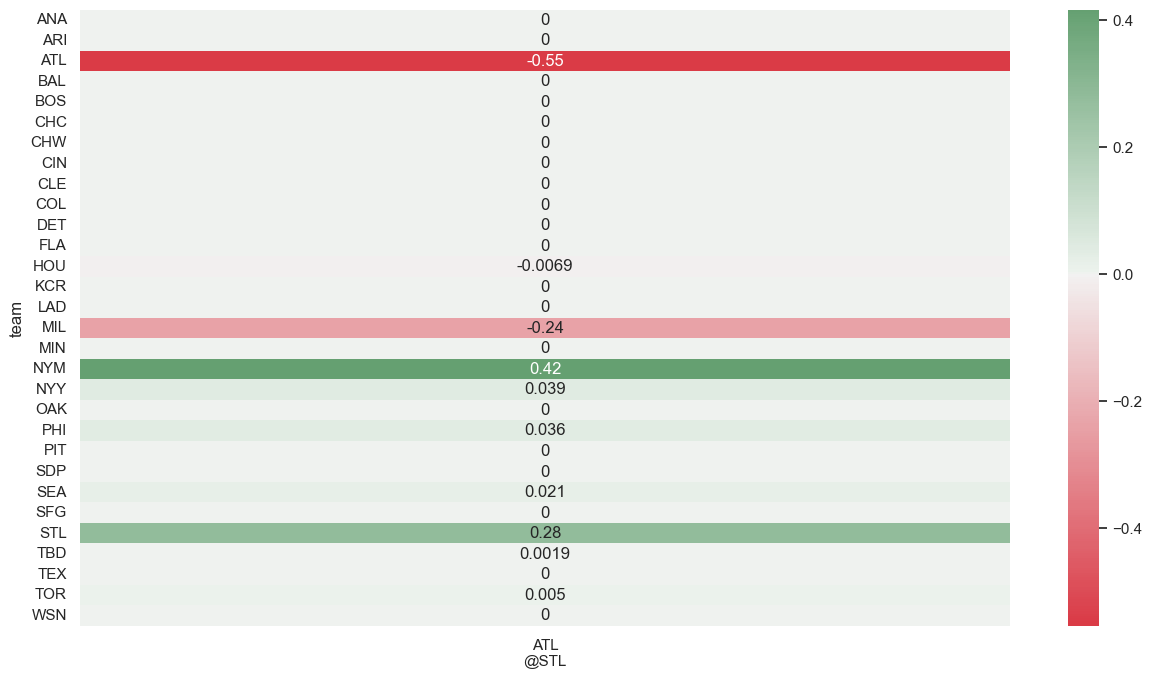

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
cmap = sns.diverging_palette(10, 133, as_cmap=True)
sns.heatmap(for_graphing, cmap=cmap, annot=True, center=0)

In [ ]:
(abs(results)).sum(axis=0).sort_values()

517    159.5
dtype: float64

In [ ]:
results.sum(axis=1).sum()

0.0

In [ ]:
gamewise_leverage = for_graphing.abs().sum(axis=0).sort_values(ascending=False)
gamewise_leverage

ATL\n@STL    1.595
dtype: float64